<a href="https://colab.research.google.com/github/gdepradd/porto_python_poject/blob/main/GedePradnytananda_CarDetectionUsingYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np
import pathlib

In [ ]:
data_dir =  pathlib.Path('/content/Cars Detection')
class_name = [item.name for item in data_dir.glob('*')]
print(class_name)

['test', 'valid', 'Untitled.ipynb', '.ipynb_checkpoints', '*', 'data.yaml', 'train']


In [ ]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2] / 2, bboxes[1] - bboxes[3] / 2
    xmax, ymax = bboxes[0]+bboxes[2] / 2, bboxes[1] + bboxes[3] / 2
    return xmin, ymin, xmax, ymax

In [ ]:
class_names = ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)

        # denormalize the coordinates
        xmin = int(x1 * w)
        ymin = int(y1 * h)
        xmax = int(x2 * w)
        ymax = int(y2 * h)
        width = xmax - xmin
        height = ymax - ymin

        class_name = class_names[int(labels[box_num])]

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        )

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))

        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))

        # Text width and height
        tw, th = cv2.getTextSize(class_name, 0, fontScale=font_scale, thickness=font_thickness)[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image,
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image,
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [ ]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()

    num_images = len(all_training_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

In [ ]:
plot(image_paths = './drive/My Drive/Coolyeah/Semester 5/AI/BigProject/Darurat/Cars Detection/test/images/*',
     label_paths = './drive/My Drive/Coolyeah/Semester 5/AI/BigProject/Darurat/Cars Detection/test/labels/*',
     num_samples=4)

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
#import os

from ultralytics import YOLO

# Load a model
model = YOLO("yolov3.pt")

PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:02<00:00, 69.9MB/s]


In [ ]:
!cp -r "/content/drive/MyDrive/Coolyeah/Semester 5/AI/BigProject/Darurat/Cars Detection/" "/content/"

In [ ]:
results = model.train(data="/content/Cars Detection/data.yaml", epochs=10)

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=/content/Cars Detection/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=

100%|██████████| 755k/755k [00:00<00:00, 22.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]


AMP: checks passed ✅


train: Scanning /content/Cars Detection/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:01<00:00, 442.77it/s]

train: New cache created: /content/Cars Detection/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Cars Detection/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 429.24it/s]


val: New cache created: /content/Cars Detection/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      12.6G      1.231      3.248      1.735         31        640: 100%|██████████| 55/55 [01:02<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]

                   all        250        454    0.00438      0.391     0.0047    0.00252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      13.4G      1.607      3.009      2.042         20        640: 100%|██████████| 55/55 [01:04<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        250        454      0.218     0.0721     0.0229    0.00878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      13.4G      1.651      2.957      2.105         18        640: 100%|██████████| 55/55 [01:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        250        454     0.0037       0.34    0.00261   0.000881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      13.5G      1.626      2.908      2.054         23        640: 100%|██████████| 55/55 [01:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        250        454      0.303      0.193      0.103     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      13.4G      1.605      2.754      2.038         19        640: 100%|██████████| 55/55 [01:04<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        250        454      0.316      0.292      0.126     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      13.5G       1.48      2.549      1.908         30        640: 100%|██████████| 55/55 [01:04<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        250        454      0.312      0.198      0.122     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      13.2G      1.387       2.45      1.863         20        640: 100%|██████████| 55/55 [01:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        250        454      0.356       0.24      0.151      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      13.5G      1.297      2.329      1.783         18        640: 100%|██████████| 55/55 [01:04<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        250        454      0.568      0.193      0.161      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      13.4G      1.241      2.187      1.717         28        640: 100%|██████████| 55/55 [01:04<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        250        454      0.213      0.365      0.195      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      13.5G      1.194      2.042      1.652         19        640: 100%|██████████| 55/55 [01:04<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        250        454      0.264      0.372      0.232      0.162



10 epochs completed in 0.306 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv3 summary (fused): 226 layers, 103668095 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


                   all        250        454      0.264      0.372      0.232      0.162
             Ambulance        250         64      0.368      0.625      0.453      0.375
                   Bus        250         46      0.151      0.304      0.148      0.112
                   Car        250        238      0.368      0.412       0.26      0.171
            Motorcycle        250         46      0.341      0.348      0.205     0.0909
                 Truck        250         60     0.0933      0.172     0.0959     0.0619
Speed: 0.4ms preprocess, 23.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
mterics = model.val()

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv3 summary (fused): 226 layers, 103668095 parameters, 0 gradients, 282.2 GFLOPs


val: Scanning /content/Cars Detection/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.01it/s]


                   all        250        454      0.264      0.372      0.232      0.162
             Ambulance        250         64      0.368      0.625      0.453      0.375
                   Bus        250         46      0.151      0.304      0.148      0.112
                   Car        250        238      0.368      0.412      0.261      0.171
            Motorcycle        250         46      0.341      0.348      0.205      0.091
                 Truck        250         60     0.0931      0.171     0.0959     0.0619
Speed: 0.7ms preprocess, 51.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
prediksi = model.predict('/content/mobil.jpg')


image 1/1 /content/mobil.jpg: 384x640 1 Car, 73.3ms
Speed: 13.4ms preprocess, 73.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
res_plotted = prediksi[0].plot()

In [ ]:
res_plotted

array([[[221, 219, 231],
        [221, 219, 231],
        [222, 220, 232],
        ...,
        [200, 189, 192],
        [200, 189, 192],
        [200, 189, 192]],

       [[221, 219, 231],
        [221, 219, 231],
        [222, 220, 232],
        ...,
        [200, 189, 192],
        [200, 189, 192],
        [200, 189, 192]],

       [[222, 220, 232],
        [222, 220, 232],
        [222, 220, 232],
        ...,
        [199, 189, 195],
        [199, 189, 195],
        [199, 189, 195]],

       ...,

       [[121, 119, 131],
        [121, 119, 131],
        [120, 118, 130],
        ...,
        [107, 112, 121],
        [107, 112, 121],
        [107, 112, 121]],

       [[116, 114, 126],
        [117, 115, 127],
        [118, 116, 128],
        ...,
        [108, 113, 122],
        [108, 113, 122],
        [108, 113, 122]],

       [[113, 111, 123],
        [114, 112, 124],
        [116, 114, 126],
        ...,
        [ 97, 102, 111],
        [ 97, 102, 111],
        [ 97, 102, 111]]

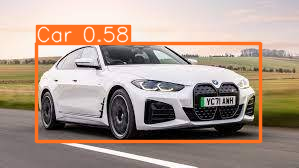

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(res_plotted)

In [ ]:
len(prediksi)

1